# Visualising Other MRI Modalities

So far we have visualised structural MR images that provides morphological information. This gives us an idea of what an individual's brain looks like and enables us to calculate useful measures like the volume or thickness of tissues.

But MRI is versatile. Tuning the MRI scanner differently can provide a wide range of information such as the movement of blood or water. These can inform us about functional and microstructural brain changes.

In [1]:
# a figure showing different modalities?
# explain what modalities means?

## Diffusion MRI

Diffusion MRI is sensitive to the movement of water in the brain. The movement of water in the brain is highly directional. This means it is more likely to move along the connections between brain areas. 

We can use this information to build an image of what the connections in our brain looks like. 

In [5]:
# image explaining diffusion MRI

First lets download some diffusion MRI data.

In [1]:
# load packages - DIPY is a python diffusion MRI processing package.
import dipy.reconst.dti as dti
from dipy.data import get_fnames

# download an open diffusion MRI dataset from DIPY
hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')

We need to process the diffusion MRI data before we can visualise it. Run the cell below but don't worry about the details. If you'd like more information on what this code does, view the [DIPY examples](https://dipy.org/documentation/1.5.0/examples_built/reconst_dti/#example-reconst-dti) or the [diffusion MRI software carpentry course](https://carpentries-incubator.github.io/SDC-BIDS-dMRI/).

*The cell below may take a while!*

In [2]:
from dipy.io.image import load_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.segment.mask import median_otsu

# load data
data, affine = load_nifti(hardi_fname)
bvals, bvecs = read_bvals_bvecs(hardi_bval_fname, hardi_bvec_fname)

# create gradient table
gtab = gradient_table(bvals, bvecs)

# create brain mask
maskdata, mask = median_otsu(data, vol_idx=range(0, 9), numpass=1, dilate=5)

# fit the diffusion tensor model
dti_model = dti.TensorModel(gtab)
dti_fit = dti_model.fit(maskdata)

# extract mean diffusivity (MD) and fractional anisotropy (FA) maps
MD = dti_fit.md
FA = dti_fit.fa


We can then visualise two common measures derived from diffusion MRI data:
1. Mean diffusivity (MD): highest in the cerebrospinal fluid surrounding the brain.
2. Fractional anisotropy (FA): highest in the white matter that contains many connections.

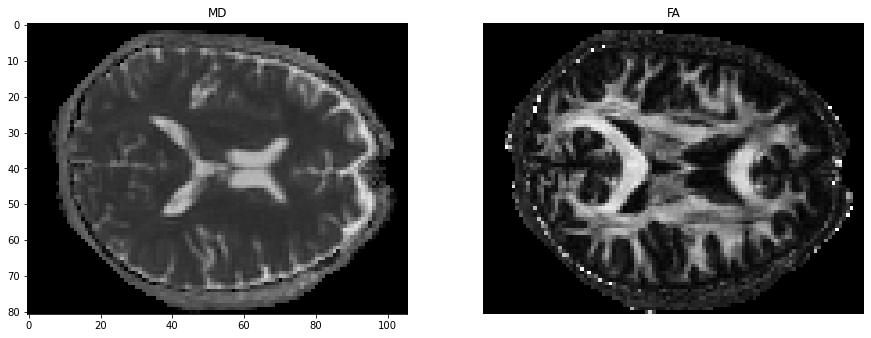

In [3]:
import matplotlib.pyplot as plt

ax_slice = dti_fit.md.shape[2] // 2;

plt.figure(figsize=(15, 20))

plt.subplot(1, 2, 1)
plt.imshow(MD[..., ax_slice], cmap='gray', vmin=0, vmax=3e-3)
plt.title("MD")

plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(FA[:, :, ax_slice], cmap='gray', vmin=0, vmax=1)
plt.title("FA")

plt.show()

Diffusion MRI is sensitive to water diffusing along connections in the brain. We can get a sense of this directionality by colour coding the direction of water diffusion.

This can be seen below where:
- Red: connections running in the left-right direction
- Green: connections running in the anterior-posterior direction
- Blue: connections running in the superior-inferior direction

Text(0.5, 1.0, 'Color coded FA')

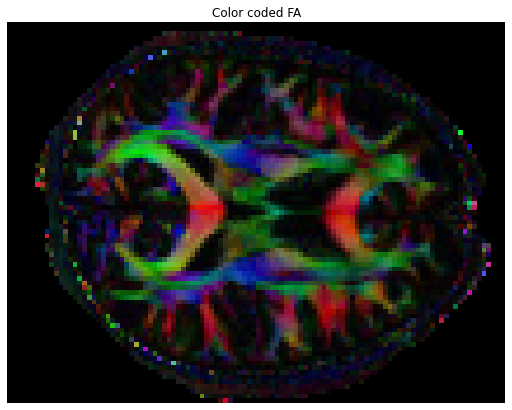

In [16]:
from dipy.reconst.dti import color_fa
import numpy as np

FA = np.clip(FA, 0, 1)  # Just to ensure that FA values are between 0 and 1
colored_FA = color_fa(FA, dti_fit.evecs)

plt.figure(figsize=(9, 7))
plt.subplot(1, 1, 1).set_axis_off()
plt.imshow(colored_FA[:, :, ax_slice])
plt.title("Color coded FA")

## Functional MRI
Functional MRI is sensitive to changes in blood flow and oxygenation as a result of brain activity. For example, when an area of the brain is being used in a cognitive task, brain cells need more oxygen. More blood flows to the area to deliver this oxygen.

Measuring when and where these changes in blood flow occurs in the brain can give us an understanding of what brain areas are used when undertaking various aspects of cognition.

In [5]:
# image explaining fMRI

In [6]:
# download open fMRI data (see other episodes here)

In [ ]:
# view in nibabel/nilearn